In [7]:
import pandas as pd
import ydata_profiling as yp 

import matplotlib.pyplot as plt


# Load the provided datasets
file_prices  = './SP500_close_price_no_missing.csv'
file_tickers = './SP500_ticker.csv'

# Attempting to read the tickers data with a different encoding
try:
    tickers_data = pd.read_csv(file_tickers, encoding='ISO-8859-1')
except Exception as e:
    error_message = str(e)
else:
    error_message = ''
    tickers_head = tickers_data.head()

tickers_head, error_message


# Display the first few rows of each dataset for initial inspection
prices_head = prices_data.head()
tickers_head = tickers_data.head()

prices_head, tickers_head


(         date    MMM    ACE    ABT    ANF   ADBE   AMD    AES    AET    AFL  \
 0  2011-01-03  86.79  62.24  47.82  58.03  31.29  8.47  12.54  31.04  57.54   
 1  2011-01-04  86.67  62.20  48.27  56.22  31.51  8.77  12.60  31.20  56.49   
 2  2011-01-05  86.67  61.99  48.27  55.35  32.22  8.91  12.77  31.50  56.38   
 3  2011-01-06  86.14  61.72  48.17  53.53  32.27  8.69  12.99  32.09  56.07   
 4  2011-01-07  86.23  61.26  48.37  53.57  32.04  8.83  12.99  32.16  55.85   
 
    ...    WYN    WYNN    XEL    XRX   XLNX     XL   YHOO    YUM    ZMH   ZION  
 0  ...  30.67  108.99  23.56  11.71  29.42  22.16  16.75  49.09  54.97  25.17  
 1  ...  30.48  112.39  23.66  11.40  29.54  22.05  16.59  48.34  54.24  24.76  
 2  ...  30.38  113.84  23.52  11.46  29.64  22.17  16.91  48.57  54.28  24.90  
 3  ...  29.94  114.67  23.50  11.46  30.14  22.16  17.06  48.91  52.60  24.83  
 4  ...  29.83  118.73  23.71  11.30  29.97  22.12  16.90  49.52  52.59  24.57  
 
 [5 rows x 472 columns],
   ti

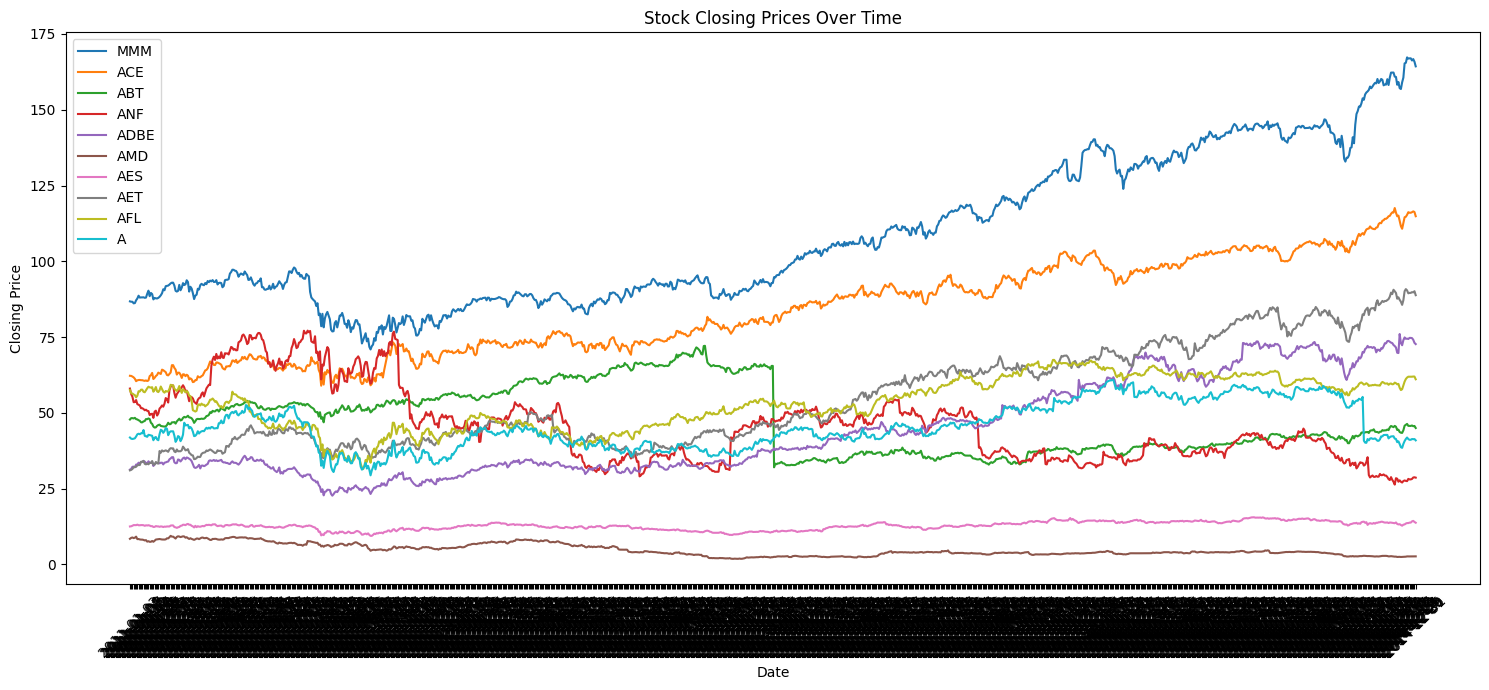

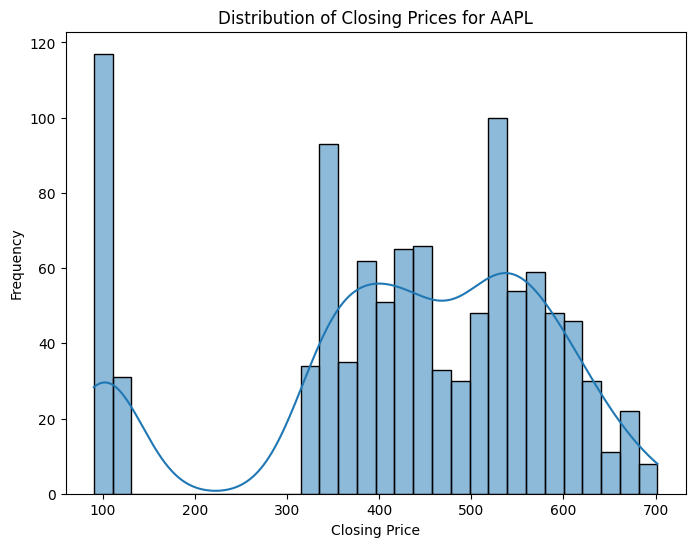

(Series([], dtype: int64), Series([], dtype: int64))

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing values in both datasets
missing_values_prices = prices_data.isnull().sum()
missing_values_tickers = tickers_data.isnull().sum()

# Visualizations
# Selecting a subset of stocks for visualization to avoid overplotting
sample_stocks = prices_data.columns[1:11]

# Line plot for the selected stocks over time
plt.figure(figsize=(15, 7))
for stock in sample_stocks:
    plt.plot(prices_data['date'], prices_data[stock], label=stock)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Histogram of closing prices for a single stock (example: 'AAPL')
plt.figure(figsize=(8, 6))
sns.histplot(prices_data['AAPL'], bins=30, kde=True)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices for AAPL')

plt.show()

missing_values_prices_summary = missing_values_prices[missing_values_prices > 0]
missing_values_tickers_summary = missing_values_tickers[missing_values_tickers > 0]

missing_values_prices_summary, missing_values_tickers_summary


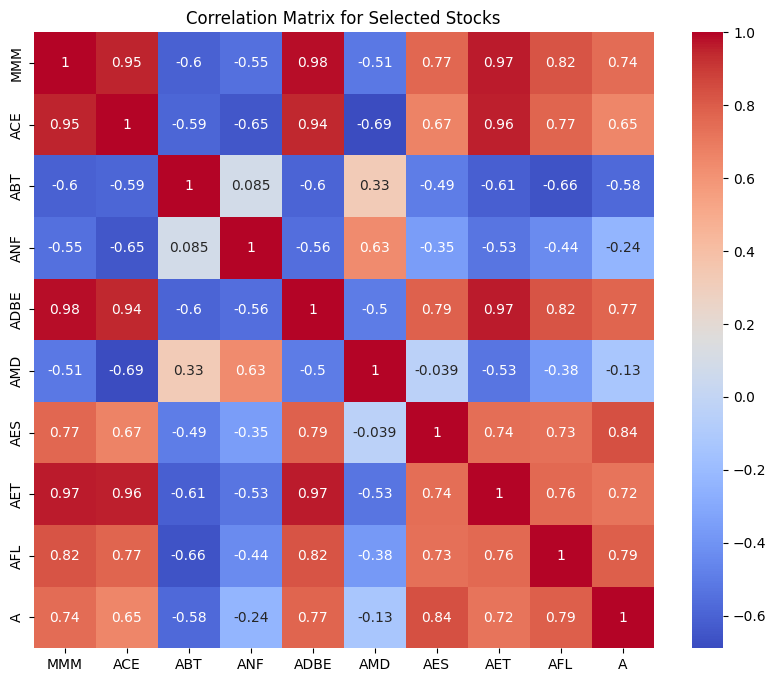

In [9]:
# Correlation Analysis
# Using the same subset of stocks for correlation analysis
correlation_matrix = prices_data[sample_stocks].corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Stocks')
plt.show()


### Fit a PCA model to log returns  (log return = log( Price [t+1]/Price [t]) derived from stock price data

In [3]:
import numpy as np
import pandas as pd

prices_data  = './SP500_close_price_no_missing.csv'

prices_data = pd.read_csv(prices_data)

log_returns = np.log(prices_data.iloc[:, 1:] / prices_data.iloc[:, 1:].shift(1))
log_returns.dropna(inplace=True)


In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(log_returns)
log_returns.head()


,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
1,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
3,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
4,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526
5,0.010613,-0.013145,-0.008930,0.012429,0.028310,0.039961,-0.001541,0.001864,-0.012975,0.014313,...,-0.008754,-0.000253,-0.006347,0.009687,0.007976,0.000904,-0.017911,0.001413,0.007766,-0.018070


### Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

Top 5 Eigenvalues: [1.12327919 0.2416124  0.13029264 0.05944462 0.00538179]


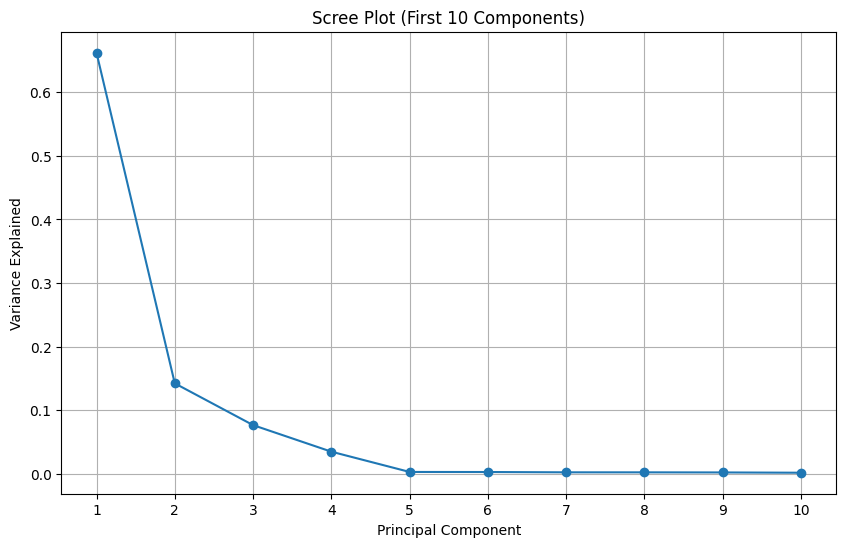

In [23]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
file_path = './SP500_close_price_no_missing.csv'
sp500_data = pd.read_csv(file_path)

# Calculate log returns
log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1)).dropna()

# Apply PCA
pca = PCA()
pca.fit(log_returns)

# Eigenvalues (variance explained by each principal component)
eigenvalues = pca.explained_variance_

# Display the top 5 eigenvalues
print("Top 5 Eigenvalues:", eigenvalues[:5])

# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the scree plot for the first 10 principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance_ratio[:10], marker='o')  # Focus on first 10 components
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot (First 10 Components)')
plt.xticks(range(1, 11))  # Setting x-axis ticks to show each component
plt.grid(True)
plt.show()


#### Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction (i.e. the horizontal axis will show the number of components kept, the vertical axis will show the cumulative percentage of variance retained).


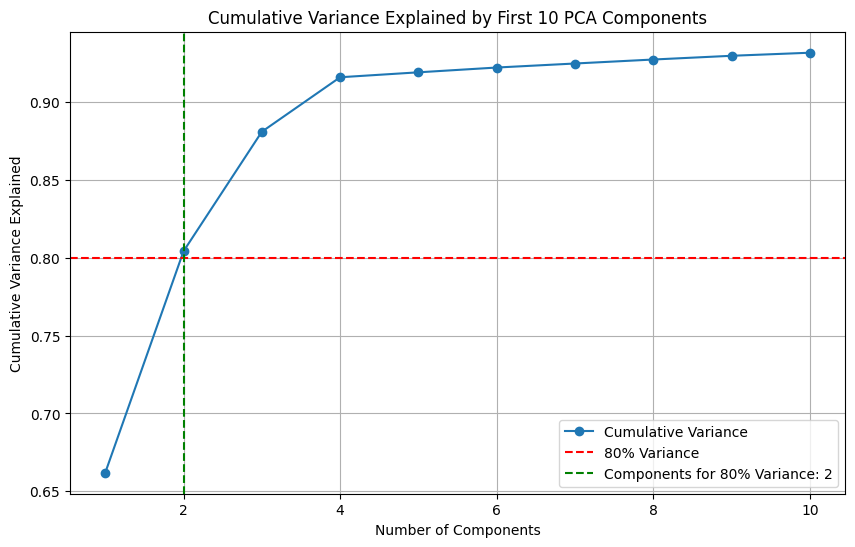

In [24]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
file_path = './SP500_close_price_no_missing.csv'
sp500_data = pd.read_csv(file_path)

# Calculate log returns
log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1)).dropna()

# Apply PCA
pca = PCA()
pca.fit(log_returns)

# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the cumulative variance explained by the principal components
cumulative_variance = np.cumsum(explained_variance_ratio)

# Identifying the point where cumulative variance reaches or exceeds 0.80 (80%)
n_components_for_80_percent_variance = np.where(cumulative_variance >= 0.80)[0][0] + 1

# Plotting the cumulative variance for the first 10 components
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_variance[:10], marker='o', label='Cumulative Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')
if n_components_for_80_percent_variance <= 10:
    plt.axvline(x=n_components_for_80_percent_variance, color='g', linestyle='--', label=f'Components for 80% Variance: {n_components_for_80_percent_variance}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by First 10 PCA Components')
plt.legend()
plt.grid(True)
plt.show()


#### Analysis of principal components and weights 

#### Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior. 

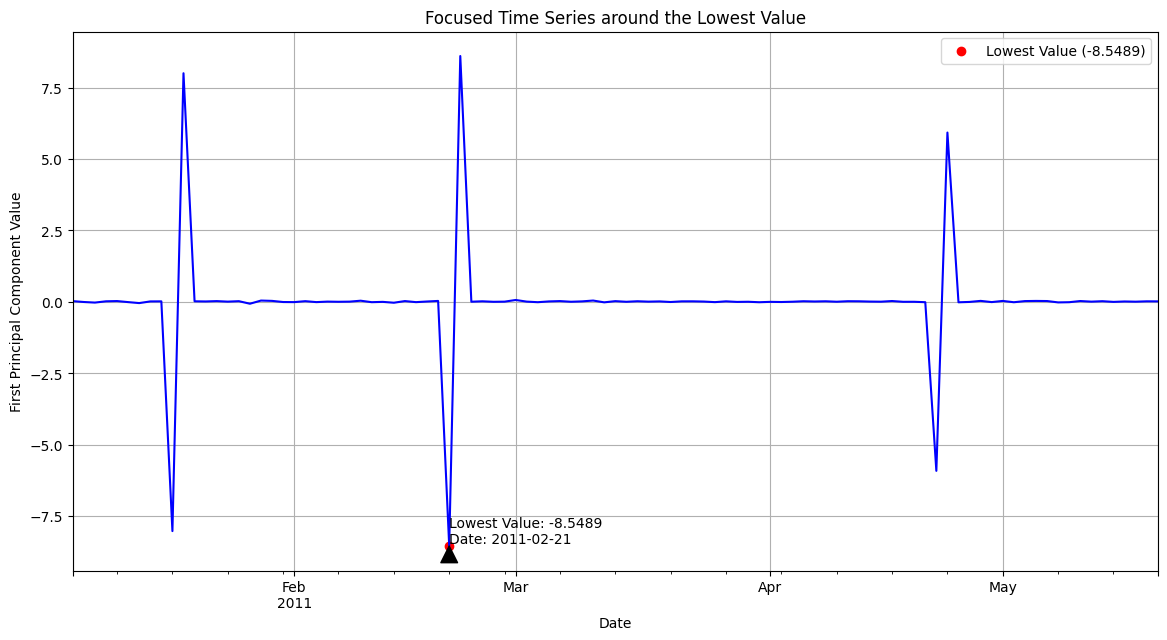

In [32]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Read the data
file_path = './SP500_close_price_no_missing.csv'
sp500_data = pd.read_csv(file_path)

# Calculate log returns
log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1)).dropna()

# Apply PCA
pca = PCA(n_components=1)
pca.fit(log_returns)
first_principal_component = pca.transform(log_returns)[:, 0]

# Convert the index to datetime
dates = pd.to_datetime(sp500_data.iloc[1:, 0])  # Adjusting for the dropped row in log_returns

# Create a time series for the first principal component
first_pc_series = pd.Series(first_principal_component, index=dates)

# Identify the date with the lowest value for the first component
min_date = first_pc_series.idxmin()
min_value = first_pc_series.min()

# Define the window size (e.g., 3 months before and after)
window_size = pd.DateOffset(months=3)

# Select the subset around the minimum date
subset_series = first_pc_series[(first_pc_series.index >= min_date - window_size) & (first_pc_series.index <= min_date + window_size)]

# Plot the subset
plt.figure(figsize=(14, 7))
subset_series.plot(title='Focused Time Series around the Lowest Value', color='blue')
plt.xlabel('Date')
plt.ylabel('First Principal Component Value')
plt.grid(True)

# Highlight the lowest value
plt.scatter(min_date, min_value, color='red', label=f'Lowest Value ({min_value:.4f})')
plt.legend()

# Annotate the lowest value
plt.annotate(f'Lowest Value: {min_value:.4f}\nDate: {min_date.strftime("%Y-%m-%d")}', 
             xy=(min_date, min_value), xytext=(min_date, min_value + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


The date identified with the lowest value for the first principal component is February 21, 2011. Upon searching for events around this date, it was found that U.S. trading markets were closed on February 21, 2011, in observance of President's Day. Since the markets were closed, there would be no trading data for this date, which means the observed low value in the first principal component is likely an artifact of the data processing or an error in the dataset rather than an actual market event.

### 2.Extract the weights from the PCA model for 1st and 2nd principal components. 

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the provided CSV file
file_path = './SP500_close_price_no_missing.csv'
sp500_data = pd.read_csv(file_path)

# Calculate the log returns, skipping the first column which contains dates
log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1)).dropna()

# Initialize PCA with 2 components
pca = PCA(n_components=2)
# Fit PCA on the log returns data
pca.fit(log_returns)

# Extracting the weights (loadings) for the first two principal components
weights_first_component = pca.components_[0]
weights_second_component = pca.components_[1]

# The weights are associated with each feature (stock) in the original data
stock_names = sp500_data.columns[1:]  # Skipping the date column

# Creating a DataFrame for better visualization of the weights for both components
weights_df = pd.DataFrame(data={'Stock': stock_names, 
                                '1st Component': weights_first_component, 
                                '2nd Component': weights_second_component})

weights_df.head()  # Displaying the first few rows of the weights DataFrame


,Stock,1st Component,2nd Component
0,MMM,-0.000253,-0.000499
1,ACE,-0.000424,-0.000912
2,ABT,0.000071,-0.000076
3,ANF,-0.000285,0.000185
4,ADBE,-0.000573,-0.000188


### Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured?

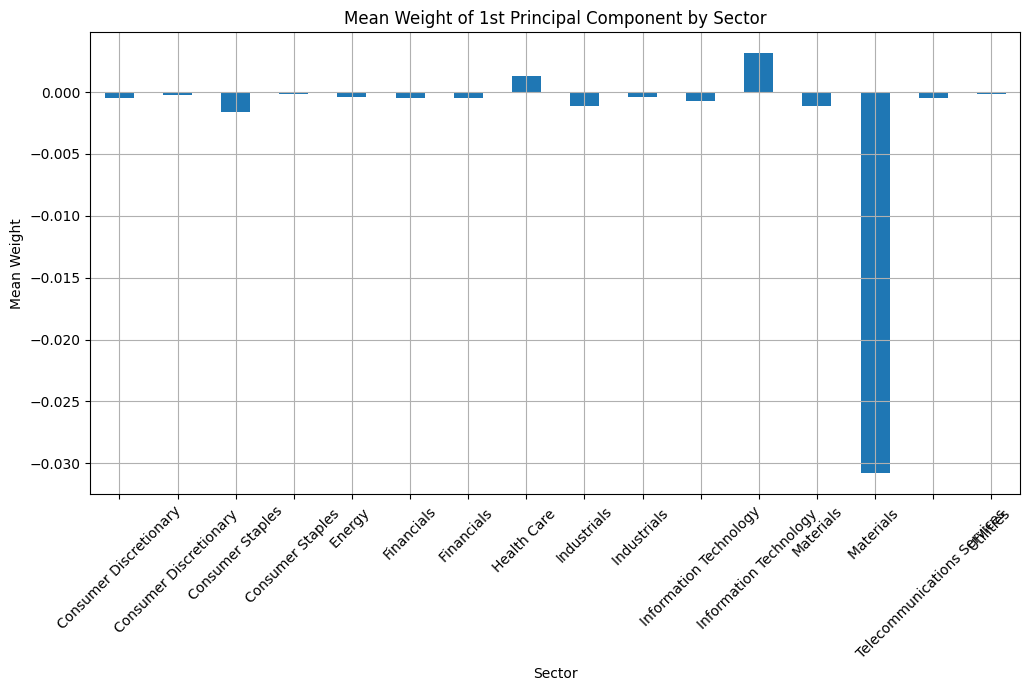

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

stock_price_file_path  = './SP500_close_price_no_missing.csv'
sector_file_path = './SP500_ticker.csv'


# Reading the stock price data and sector data
stock_prices = pd.read_csv(stock_price_file_path)
sector_data = pd.read_csv(sector_file_path, encoding='ISO-8859-1')

# Convert stock price data to numeric
stock_prices.iloc[:, 1:] = stock_prices.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the log returns
log_returns = np.log(stock_prices.iloc[:, 1:] / stock_prices.iloc[:, 1:].shift(1)).dropna()

# Apply PCA
pca = PCA(n_components=2)
pca.fit(log_returns)
weights_first_component = pca.components_[0]

# Creating DataFrame for the weights
weights_df = pd.DataFrame({'Stock': stock_prices.columns[1:], '1st Component': weights_first_component})

# Merge with sector data
merged_data = pd.merge(weights_df, sector_data, left_on='Stock', right_on='ticker')

# Group by sector and calculate mean weights
mean_weights_by_sector = merged_data.groupby('sector')['1st Component'].mean()

# Plot the mean weights per sector
mean_weights_by_sector.plot(kind='bar', figsize=(12, 6), title='Mean Weight of 1st Principal Component by Sector')
plt.ylabel('Mean Weight')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Make a similar plot for the 2nd principal component.  What kind of information do you think does this component reveal? (Hint: look at the signs and magnitudes.)

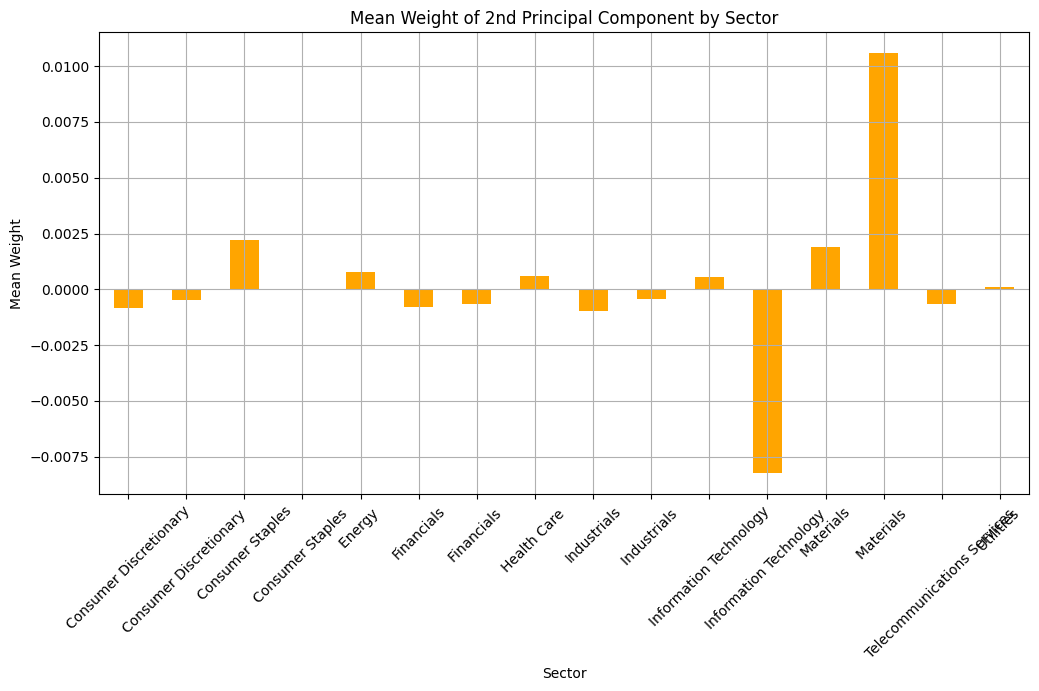

In [14]:
# Extracting weights for the second principal component
weights_second_component = pca.components_[1]

# Creating DataFrame for the weights of the 2nd component
weights_df_2nd = pd.DataFrame({'Stock': stock_prices.columns[1:], '2nd Component': weights_second_component})

# Merge with sector data
merged_data_2nd = pd.merge(weights_df_2nd, sector_data, left_on='Stock', right_on='ticker')

# Group by sector and calculate mean weights for the 2nd component
mean_weights_by_sector_2nd = merged_data_2nd.groupby('sector')['2nd Component'].mean()

# Plot the mean weights per sector for the 2nd component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind='bar', color='orange', title='Mean Weight of 2nd Principal Component by Sector')
plt.ylabel('Mean Weight')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Let us experiment with a few feature selection methods. We will use data stored in the ‘BMI.csv’ file. This data contains measurements of Body Mass Index (BMI) obtained for a number of human subjects. The goal is to predict fat percentage (fatpctg) using all other features available in data. 

#### a) Wrapper method: Search for the best set of features using backward and forward stepwise regression

In [38]:
# Re-loading the dataset as the previous loading was not successful
import pandas as pd

# Load the dataset
bmi_data = pd.read_csv('./BMI.csv')

# Display the first few rows of the dataset for verification
bmi_data.head()


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


## Backward

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from tabulate import tabulate
import pandas as pd

# Create an instance of LinearRegression
model = LinearRegression()

# Specify the target column
target_column = 'fatpctg'

# Perform Recursive Feature Elimination with Cross-Validation for backward elimination
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
X = bmi_data.drop(columns=target_column)
y = bmi_data[target_column]
rfecv.fit(X, y)

# Selected features and optimal number of features
selected_features_backward = X.columns[rfecv.support_]
optimal_num_features_backward = rfecv.n_features_

# Preparing data for tabulate
data = [["Selected Features", ', '.join(selected_features_backward)],
        ["Optimal Number of Features", optimal_num_features_backward]]

# Displaying the data in tabular format
print(tabulate(data, headers="firstrow", tablefmt="grid"))





+----------------------------+------------------------+
| Selected Features          |   Neck, Abdomen, Wrist |
+============================+========================+
| Optimal Number of Features |                      3 |
+----------------------------+------------------------+


## Forward

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def simplified_forward_selection(data, target_column, model):
    remaining = set(data.columns)
    remaining.remove(target_column)
    selected = []
    current_score, best_new_score = 0.0, 0.0

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            selected_with_candidate = selected + [candidate]
            X_train = data[selected_with_candidate]
            score = cross_val_score(model, X_train, data[target_column], cv=5).mean()
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    return selected

# Perform feature selection
forward_selected_features = simplified_forward_selection(bmi_data, 'fatpctg', LinearRegression())

# Prepare data for tabulate
from tabulate import tabulate
data = [["Selected Features", ', '.join(forward_selected_features)]]

# Displaying the data in tabular format
print(tabulate(data, headers=["Feature Selection", "Features"], tablefmt="grid"))


+---------------------+--------------------------------------------+
| Feature Selection   | Features                                   |
+=====================+============================================+
| Selected Features   | Abdomen, Weight, Neck, Forearm, Hip, Thigh |
+---------------------+--------------------------------------------+



#### b) Filter method:  output a ranking of features using correlation statistics (i.e. between any of the input variables and output) 


In [52]:
# Calculate the correlation matrix
correlation_matrix = bmi_data.corr()

# Extract the correlations of all features with the target variable 'fatpctg'
feature_correlations = correlation_matrix['fatpctg'].drop('fatpctg')

# Sort the features based on the absolute value of their correlation with 'fatpctg'
ranked_features = feature_correlations.abs().sort_values(ascending=False)

# Create a table with headings for the ranked features
table_data = [["Feature", "Correlation"]]
for feature, correlation in ranked_features.items():
    table_data.append([feature, f"{correlation:.3f}"])

# Display the table
from tabulate import tabulate
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))



+-----------+---------------+
| Feature   |   Correlation |
+===========+===============+
| Abdomen   |         0.813 |
+-----------+---------------+
| Chest     |         0.703 |
+-----------+---------------+
| Hip       |         0.625 |
+-----------+---------------+
| Weight    |         0.613 |
+-----------+---------------+
| Thigh     |         0.56  |
+-----------+---------------+
| Knee      |         0.509 |
+-----------+---------------+
| Biceps    |         0.493 |
+-----------+---------------+
| Neck      |         0.491 |
+-----------+---------------+
| Forearm   |         0.361 |
+-----------+---------------+
| Wrist     |         0.347 |
+-----------+---------------+
| Age       |         0.291 |
+-----------+---------------+
| Ankle     |         0.266 |
+-----------+---------------+
| Height    |         0.133 |
+-----------+---------------+


##### c) Embedded method: (1) Lasso regression; (2) random forest (feature importance ranking) 
    

In [51]:
# Importing the tabulate library for table formatting
from tabulate import tabulate

# Formatting and printing the Lasso Regression coefficients in a table
lasso_table = tabulate(lasso_coefficients.items(), headers=['Feature', 'Coefficient'], tablefmt='grid', floatfmt=".3f")
print("Lasso Regression Feature Coefficients\n")
print(lasso_table)

# Formatting and printing the Random Forest feature importances in a table
rf_table = tabulate(rf_feature_importances.sort_values(ascending=False).items(), headers=['Feature', 'Importance'], tablefmt='grid', floatfmt=".3f")
print("\nRandom Forest Feature Importance Rankings\n")
print(rf_table)


Lasso Regression Feature Coefficients

+-----------+---------------+
| Feature   |   Coefficient |
+===========+===============+
| Age       |         0.068 |
+-----------+---------------+
| Weight    |        -0.049 |
+-----------+---------------+
| Height    |        -0.053 |
+-----------+---------------+
| Neck      |        -0.529 |
+-----------+---------------+
| Chest     |        -0.047 |
+-----------+---------------+
| Abdomen   |         0.953 |
+-----------+---------------+
| Hip       |        -0.263 |
+-----------+---------------+
| Thigh     |         0.252 |
+-----------+---------------+
| Knee      |        -0.092 |
+-----------+---------------+
| Ankle     |         0.152 |
+-----------+---------------+
| Biceps    |         0.140 |
+-----------+---------------+
| Forearm   |         0.435 |
+-----------+---------------+
| Wrist     |        -1.672 |
+-----------+---------------+

Random Forest Feature Importance Rankings

+-----------+--------------+
| Feature   |   Im

## Code for Bonus Task : 

##Rerun the PCA analysis with the most updated data downloaded from the available stock price API. 

In [7]:
import yfinance as yf
import pandas as pd

# Load the uploaded stock price data
file_path = './stock_prices.csv'
stock_data = pd.read_csv(file_path)

# Displaying the first few rows of the data to understand its structure
stock_data.head()


# Updated list of stock symbols
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]  

# Download stock data
stock_data = yf.download(symbols, start="2023-01-01", end="2023-11-27")

# Save the data to a CSV file
stock_data.to_csv("stock_prices.csv")


[*********************100%%**********************]  5 of 5 completed


In [11]:
import pandas as pd

# Load the data
stock_data = pd.read_csv('./stock_prices.csv')

# Check if the first two rows exist and remove them
if len(stock_data) > 2:
    stock_data_cleaned = stock_data.drop([0, 1]).reset_index(drop=True)
else:
    stock_data_cleaned = stock_data.copy()

# Renaming the columns for clarity
columns = ['Date', 'AAPL_Adj_Close', 'AMZN_Adj_Close', 'GOOGL_Adj_Close', 
           'META_Adj_Close', 'MSFT_Adj_Close', 'AAPL_Close', 'AMZN_Close', 
           'GOOGL_Close', 'META_Close', 'MSFT_Close', 'AAPL_High', 'AMZN_High', 
           'GOOGL_High', 'META_High', 'MSFT_High', 'AAPL_Low', 'AMZN_Low', 
           'GOOGL_Low', 'META_Low', 'MSFT_Low', 'AAPL_Open', 'AMZN_Open', 
           'GOOGL_Open', 'META_Open', 'MSFT_Open', 'AAPL_Volume', 'AMZN_Volume', 
           'GOOGL_Volume', 'META_Volume', 'MSFT_Volume']
stock_data_cleaned.columns = columns

# Focus on adjusted close prices for PCA
pca_data = stock_data_cleaned[['AAPL_Adj_Close', 'AMZN_Adj_Close', 'GOOGL_Adj_Close', 'META_Adj_Close', 'MSFT_Adj_Close']]

# Converting data to numeric
pca_data = pca_data.apply(pd.to_numeric, errors='coerce')

# Displaying the cleaned data for adjusted close prices
print(pca_data.head())


   AAPL_Adj_Close  AMZN_Adj_Close  GOOGL_Adj_Close  META_Adj_Close  \
0      124.374802       85.820000        89.120003      124.739998   
1      125.657639       85.139999        88.080002      127.370003   
2      124.325089       83.120003        86.199997      126.940002   
3      128.899521       86.080002        87.339996      130.020004   
4      129.426559       87.360001        88.019997      129.470001   

   MSFT_Adj_Close  
0      237.474350  
1      227.086456  
2      220.356125  
3      222.953094  
4      225.123840  


In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the stock data from the uploaded file
file_path = './stock_prices.csv'
stock_data = pd.read_csv(file_path)

# Cleaning the data
# Removing unnecessary header rows and setting the correct column headers
if len(stock_data) > 2:
    stock_data_cleaned = stock_data.drop([0, 1]).reset_index(drop=True)
else:
    stock_data_cleaned = stock_data.copy()

# Renaming the columns for clarity
columns = ['Date', 'AAPL_Adj_Close', 'AMZN_Adj_Close', 'GOOGL_Adj_Close', 
           'META_Adj_Close', 'MSFT_Adj_Close', 'AAPL_Close', 'AMZN_Close', 
           'GOOGL_Close', 'META_Close', 'MSFT_Close', 'AAPL_High', 'AMZN_High', 
           'GOOGL_High', 'META_High', 'MSFT_High', 'AAPL_Low', 'AMZN_Low', 
           'GOOGL_Low', 'META_Low', 'MSFT_Low', 'AAPL_Open', 'AMZN_Open', 
           'GOOGL_Open', 'META_Open', 'MSFT_Open', 'AAPL_Volume', 'AMZN_Volume', 
           'GOOGL_Volume', 'META_Volume', 'MSFT_Volume']
stock_data_cleaned.columns = columns

# Focus on adjusted close prices for PCA
pca_data = stock_data_cleaned[['AAPL_Adj_Close', 'AMZN_Adj_Close', 'GOOGL_Adj_Close', 'META_Adj_Close', 'MSFT_Adj_Close']]

# Converting data to numeric
pca_data = pca_data.apply(pd.to_numeric, errors='coerce')

# Standardizing the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data.dropna())

# PCA analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_data_scaled)

# Creating a DataFrame for the principal components
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

principal_df.head()



,Principal Component 1,Principal Component 2
0,4.578488,0.613665
1,4.694603,0.594822
2,4.916404,0.593182
3,4.635600,0.492390
4,4.548454,0.504366
